In [55]:
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import train_test_split

import statsmodels.api as stats
from statsmodels.stats.outliers_influence import summary_table
import pandas as pd
import numpy as np

from yellowbrick.regressor import PredictionError, ResidualsPlot, CooksDistance, LinearRegression as yb_LR
from yellowbrick.regressor.alphas import AlphaSelection

In [43]:
data = pd.read_csv('earnest_data_raw_20200129.csv')
data.head()
data = data.reindex(labels=data[data.tab.isin(['PZZA', 'DPZ', 'YUM-PH']) & 
                                (data.method_calc == 'cs_yoy') 
                                & (data.reported_metric != 0)].index)[[
    'panel_sales',
    'avg_trans_shopper',
    'avg_ticket',
    'unique_shoppers',
    'transactions',
    'reported_metric'
]]


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 19372 to 70480
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   panel_sales        58 non-null     float64
 1   avg_trans_shopper  58 non-null     float64
 2   avg_ticket         58 non-null     float64
 3   unique_shoppers    58 non-null     float64
 4   transactions       58 non-null     float64
 5   reported_metric    58 non-null     float64
dtypes: float64(6)
memory usage: 3.2 KB


In [45]:
data.head()

,panel_sales,avg_trans_shopper,avg_ticket,unique_shoppers,transactions,reported_metric
19372,0.015912,-0.0104,0.0375,-0.0105,-0.0208,0.060
19387,0.041971,0.0022,0.0395,0.0002,0.0024,0.068
19406,0.039670,0.0123,0.0290,-0.0019,0.0104,0.079
19417,0.106152,0.0304,0.0316,0.0407,0.0723,0.102
19431,0.105819,0.0266,0.0224,0.0535,0.0816,0.110


In [46]:
features = ['panel_sales',
        'avg_trans_shopper',
        'avg_ticket',
        'unique_shoppers',
        'transactions']
target = 'reported_metric'

### Train test split

In [50]:
X, y = data[features], data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### General linear model

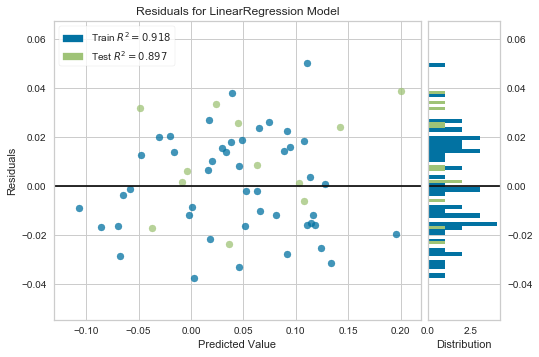

In [51]:
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()          

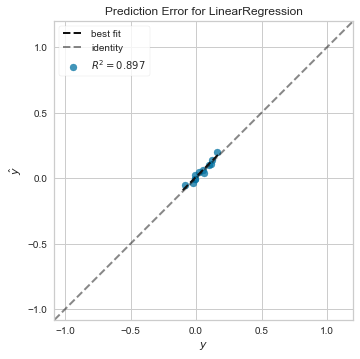

In [52]:
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()     

c:\users\skennedy\.virtualenvs\lab1-chmlaxk4\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00010303048810423113, tolerance: 2.2575515217391303e-05
  tol, rng, random, positive)
c:\users\skennedy\.virtualenvs\lab1-chmlaxk4\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00021268745494585142, tolerance: 2.2575515217391303e-05
  tol, rng, random, positive)
c:\users\skennedy\.virtualenvs\lab1-chmlaxk4\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002943685959584698, tolerance: 2.2575515217391303e-05
  tol, rng, random, positive)
c:\users\skennedy\.virtualenvs\lab1-chmlaxk4\lib\site-packa

c:\users\skennedy\.virtualenvs\lab1-chmlaxk4\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011562112392795258, tolerance: 1.653013043478261e-05
  tol, rng, random, positive)
c:\users\skennedy\.virtualenvs\lab1-chmlaxk4\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.5897154926571584e-05, tolerance: 1.9530747826086955e-05
  tol, rng, random, positive)
c:\users\skennedy\.virtualenvs\lab1-chmlaxk4\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00012188247050777187, tolerance: 1.9530747826086955e-05
  tol, rng, random, positive)
c:\users\skennedy\.virtualenvs\lab1-chmlaxk4\lib\site-packag

c:\users\skennedy\.virtualenvs\lab1-chmlaxk4\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009277437965491114, tolerance: 2.7220923404255322e-05
  tol, rng, random, positive)
c:\users\skennedy\.virtualenvs\lab1-chmlaxk4\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009277110819319017, tolerance: 2.7220923404255322e-05
  tol, rng, random, positive)
c:\users\skennedy\.virtualenvs\lab1-chmlaxk4\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009276803085456458, tolerance: 2.7220923404255322e-05
  tol, rng, random, positive)
c:\users\skennedy\.virtualenvs\lab1-chmlaxk4\lib\site-package

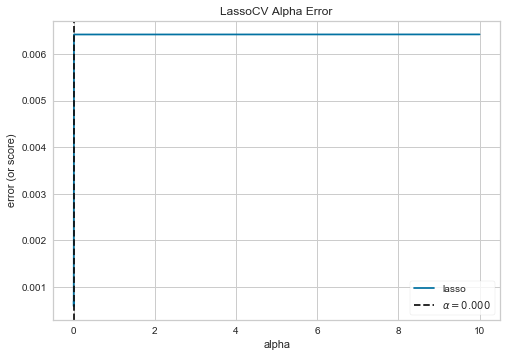

In [53]:
# Create a list of alphas to cross-validate against
alphas = np.logspace(-10, 1, 400)

# Instantiate the linear model and visualizer
model = LassoCV(alphas=alphas)
visualizer = AlphaSelection(model)
visualizer.fit(X, y)
visualizer.show()

c:\users\skennedy\.virtualenvs\lab1-chmlaxk4\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
c:\users\skennedy\.virtualenvs\lab1-chmlaxk4\lib\site-packages\yellowbrick\regressor\influence.py:183: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  self.distance_, linefmt=self.linefmt, markerfmt=self.markerfmt


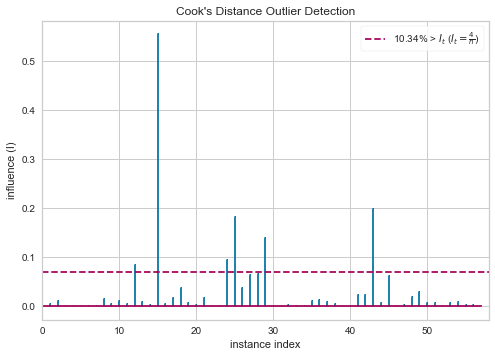

In [56]:
visualizer = CooksDistance()
visualizer.fit(X, y)
visualizer.show()

In [58]:
ybLR = yb_LR()
visualizer.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)